# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import os
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing the Data

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
os.listdir(data_dir)

['roses', 'LICENSE.txt', 'daisy', 'dandelion', 'tulips', 'sunflowers']

/root/.keras/datasets/flower_photos/sunflowers/45045005_57354ee844.jpg


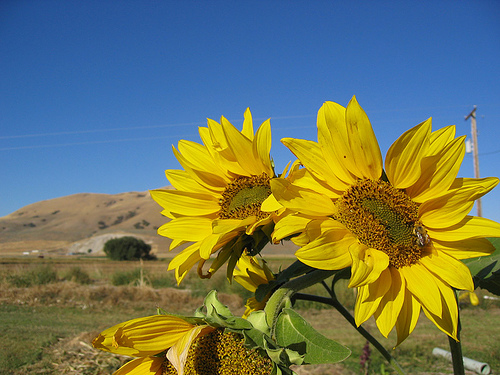

In [10]:
sunflowers = list(data_dir.glob("sunflowers/*"))
print(sunflowers[10])
PIL.Image.open(sunflowers[10])

In [6]:
img_height, img_width = 150, 150
batch_size = 32 

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode="categorical",
    seed = 123, 
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    label_mode="categorical",
    seed = 123, 
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Training the Model

In [19]:
resnet_model = Sequential()

pre_trained_model = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape = (img_height, img_width, 3),
    pooling = "avg",
    classes = 5, 
    weights = "imagenet"
)

for layer in pre_trained_model.layers:
  layer.trainable = False

resnet_model.add(pre_trained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation="softmax"))

resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
resnet_model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
92/92 [==============================] - 290s 3s/step - loss: 0.6984 - accuracy: 0.7779 - val_loss: 0.4070 - val_accuracy: 0.8556
Epoch 2/10
92/92 [==============================] - 279s 3s/step - loss: 0.2648 - accuracy: 0.9077 - val_loss: 0.3726 - val_accuracy: 0.8706
Epoch 3/10
92/92 [==============================] - 280s 3s/step - loss: 0.1437 - accuracy: 0.9506 - val_loss: 0.4364 - val_accuracy: 0.8556
Epoch 4/10
92/92 [==============================] - 277s 3s/step - loss: 0.0911 - accuracy: 0.9683 - val_loss: 0.4679 - val_accuracy: 0.8474
Epoch 5/10
92/92 [==============================] - 278s 3s/step - loss: 0.0437 - accuracy: 0.9915 - val_loss: 0.4084 - val_accuracy: 0.8760
Epoch 6/10
92/92 [==============================] - 277s 3s/step - loss: 0.0217 - accuracy: 0.9980 - val_loss: 0.4234 - val_accuracy: 0.8856
Epoch 7/10
92/92 [==============================] - 277s 3s/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.4499 - val_accuracy: 0.8828
Epoch 8/10
92

In [25]:
import pandas as pd

loss_df = pd.DataFrame(resnet_model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.698446,0.777929,0.407033,0.855586
1,0.264805,0.907698,0.372590,0.870572
2,0.143662,0.950613,0.436366,0.855586
3,0.091129,0.968324,0.467887,0.847411
4,0.043735,0.991485,0.408381,0.876022


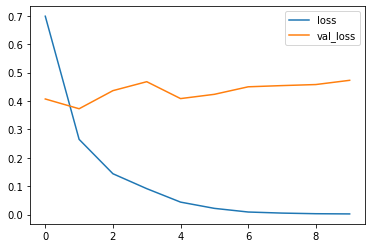

In [26]:
loss_df[['loss', 'val_loss']].plot()

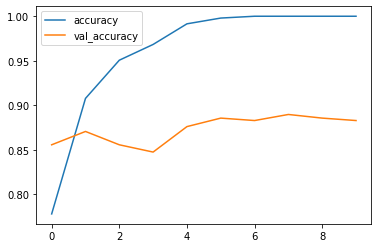

In [27]:
loss_df[['accuracy', 'val_accuracy']].plot()